<a href="https://colab.research.google.com/github/AngleKit/HomeworkPython/blob/main/ClassNotebooks/Day6_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 6: Peak-Finding
MSE 7530, Fall 2025, Wayne State University  
Wednesday, September 17th, 2025  
Prof. Camille Bishop

<font size=4>Today we will start talking about finding peaks and pre-processing data.
1. SciPy Find Peaks package  
2. Pre-processing data with smoothing & filtering data

<font size=4><font color='blue'>The topics today are broadly referred to as "signal processing". </font> Monday, we will bring in some physical techniques to expand your materials characterization toolbox.

## <font color='red'>**(Always Run These First)**</font> Part 0.5: Quick refresher and necessary import cells
Every notebook will generally start with all the necessary import cells in one place; here I will import all packages that we used at once.

In [1]:
# the standard cell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Setting up file access to the class GH Repo and your personal Google Drive

In [2]:
!git clone https://github.com/cbishop4/MSE7530.git
# from google.colab import drive
# drive.mount('/content/drive')

Cloning into 'MSE7530'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 174 (delta 69), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (174/174), 7.80 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (69/69), done.


## Scientific Python (SciPy) Introduction & Importing
<font size=4>SciPy is an open-source software heavily used in mathematics, science, and engineering. Since it is so widely used, it has very thorough documentation and support: https://docs.scipy.org/doc/scipy/index.html. It is generally pre-installed in most Python distributions, including Colab, so it doesn't have to be pip installed unless you need a specific version. While you could import scipy like so:

```
import scipy as sp
```
<font size=4>However, instead people generally import specific modules from scipy as in the below code cell:



In [3]:
from scipy import signal

<font size=4>Today we will be working with the signal processing module. Take a look around the documentation for other modules. We will use many modules through the course of the class.



## Part 1: Finding Peaks

### signal.find_peaks

<font size=4>At its base, this function uses a simple algorithm to identify peaks: It returns a peak for every location in which a point is higher than both of its neighbors.

<font size=4>First, let's just use find_peaks on a dataset to see what find_peaks will do with no control.

*I have generated "array1D" using Gemini's auto-generation, by entering the prompt "generate a noisy signal with several peaks"

Text(0, 0.5, 'Intensity')

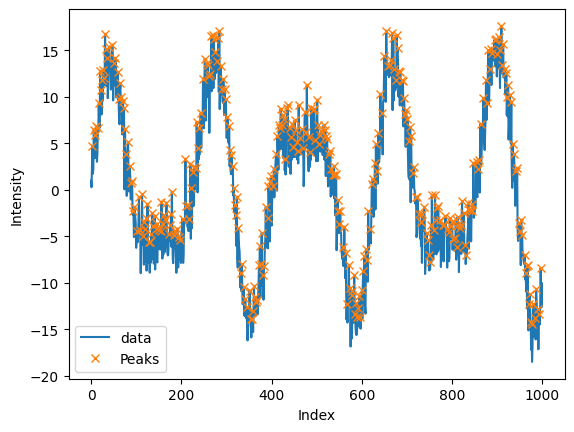

In [4]:
# generate a noisy signal with several peaks
np.random.seed(42)  # for reproducibility
x = np.linspace(0, 10, 1000)
## Array
array1D = (np.sin(x * 3) + 0.5 * np.sin(x * 5) + 0.2 * np.random.randn(len(x))) * 10
## Plotting
plt.plot(array1D,label='data')
peak_locs = signal.find_peaks(array1D)
plt.plot(peak_locs[0], array1D[peak_locs[0]], 'x',label='Peaks')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Intensity')

<font color='red'><font size=4> If the above blue signal is experimental data, is calling "find_peaks" alone going to be a good choice for interpretation?

<font size=4> See powerpoint for explanation

<font size=4> A fundamental look at the function - our "basic implementation"

In [5]:
np.random.seed(31)
basic_data = (np.random.rand(10)*10).astype(int)
print(basic_data)
output = signal.find_peaks(basic_data)
print(output)

[2 9 7 9 2 1 9 0 0 5]
(array([1, 3, 6]), {})


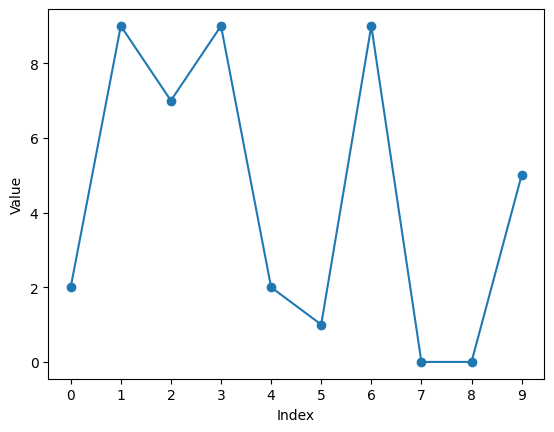

In [6]:
plt.plot(basic_data,'-o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(np.linspace(0,9,10))
plt.show()

<font size=4>We are going to look at the absolute base algorithm for this function to understand what it's doing. As you'll see, we can add aspects later to refine. What we are about to go through is hidden a few layers into the source code; don't worry about exactly where it is. **Goal: to build your algorithmic thinking skills and understand how code processes data, and how that influences your interpretation.** Here, I have written the un-commented code that you would use to find these peaks. I will go through the code line-by-line on the board. I recommend that you do one of two things:  
1. Write comments (starting with #) directly on the code below, or  
2. Take notes with paper and pencil  
<font size=4>Figure out which of these methods is better for your own learning style.

<font size=4><font color='blue'> NOTE: The code below has been substantially modified from its original form. Its original form is written to interface with other functions and C, the programming language that is one step closer to "computer-speak". It is re-written here at a level appropriate for this class.

In [8]:
x = array1D #the array on which we will find peaks (Nosiy Data we generated)

midpoints = np.empty(0,dtype=int) # empty arrays to hold our peak information
left_edges = np.empty(0,dtype=int)
right_edges = np.empty(0, dtype=int)

i = 1  # Pointer to current sample, first one can't be maxima
i_max = x.shape[0] - 1  # Last sample can't be maxima (or can use length) ==> x.shape(1000,) (while a 2D array is looks like: y.shape = (1000,2))
while i < i_max:
    # Test if previous sample is smaller
    if x[i - 1] < x[i]:# if the point you are one now is higher than the one you were on before run below code....
        i_ahead = i + 1  # Index to look ahead of current sample (defines index of next point to check)

        # Find next sample that is unequal to x[i]
        while i_ahead < i_max and x[i_ahead] == x[i]: # deals with platutoes
            i_ahead += 1 # figure out the first point NOT at value of x[i]

        # Maxima is found if next unequal sample is smaller than x[i] (This is the point wher the code confirms the value is a peak)
        if x[i_ahead] < x[i]:
          #start to put values within the empty indexs
            left_edges = np.append(left_edges,i)
            right_edges = np.append(right_edges,i_ahead-1)
            midpoints = np.append(midpoints, (i + i_ahead - 1) // 2) # fixes midpoint so you don't get an decimal values

            # Skip samples that can't be maximum
            i = i_ahead
    i += 1 # step forward

<font size=4> Double-check that our code reproduces the results from find_peaks

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
for a in ax:
  a.plot(array1D,label='data',color='k')
  a.plot(peak_locs[0], array1D[peak_locs[0]], 'x',label='SciPy Findpeaks',markersize=8)
  a.plot(midpoints,array1D[midpoints],'x',label='Our algorithm',markersize=5)
  a.legend()
ax[1].set_xlim(400,600)

#### <font color='red'>Written exercise: Manually follow the function.
<font size=4><font color='red'>You are given an array - $[1, 1, 2, 2, 2, 3, 1, 5, 7, 8, 8, 9, 1]$. Identify the midpoints, left edges, and right edges.

midpoint -- [5 , 11]

In [13]:
x = np.array([1,1,2,2,2,3,1,5,7,8,8,9,1]) #the array on which we will find peaks (Nosiy Data we generated)

midpoints = np.empty(0,dtype=int) # empty arrays to hold our peak information
left_edges = np.empty(0,dtype=int)
right_edges = np.empty(0, dtype=int)

i = 1  # Pointer to current sample, first one can't be maxima
i_max = x.shape[0] - 1  # Last sample can't be maxima (or can use length) ==> x.shape(1000,) (while a 2D array is looks like: y.shape = (1000,2))
while i < i_max:
    # Test if previous sample is smaller
    if x[i - 1] < x[i]:# if the point you are one now is higher than the one you were on before run below code....
        i_ahead = i + 1  # Index to look ahead of current sample (defines index of next point to check)

        # Find next sample that is unequal to x[i]
        while i_ahead < i_max and x[i_ahead] == x[i]: # deals with platutoes
            i_ahead += 1 # figure out the first point NOT at value of x[i]

        # Maxima is found if next unequal sample is smaller than x[i] (This is the point wher the code confirms the value is a peak)
        if x[i_ahead] < x[i]:
          #start to put values within the empty indexs
            left_edges = np.append(left_edges,i)
            right_edges = np.append(right_edges,i_ahead-1)
            midpoints = np.append(midpoints, (i + i_ahead - 1) // 2) # fixes midpoint so you don't get an decimal values

            # Skip samples that can't be maximum
            i = i_ahead
    i += 1 # step forward
print(left_edges)
print(right_edges)
print(midpoints)

[ 5 11]
[ 5 11]
[ 5 11]


#### Additional find_peaks arguments: height, threshold, distance, prominence, and width.
<font size=4>In class today, we will experiment with the argument "distance". We will not break it down in detail into the constituent code as we did above. You will experiment with the other parameters in the homework.

#### "Distance" parameter
<font size=4> Many Python functions/modules have many arguments which are default specified. As an example, here is what the documentation for "find_peaks" has:

```
find_peaks(x, height=None, threshold=None, distance=None, prominence=None,
width=None, wlen=None, rel_height=0.5, plateau_size=None)
```
<font size=4>The function find_peaks has 9 arguments. However, only one argument **needs** to be passed, which is the array on which to find peaks. The rest of the arguments all have **default values** which are set in the definition of the function with = signs. If nothing is entered for these, the code will run whatever the default is. (Note that arguments are often called parameters interchangeably)



<font size=4><font color='blue'> Here we will experiment with the "distance" parameter (argument). </font>From the documentation, this parameter is the "Required minimal horizontal distance (>= 1) in samples between neighbouring peaks. Smaller peaks are removed first until the condition is fulfilled for all remaining peaks."  
We will continue to use the same noisy data as above, and see what happens as we set different values of the "distance" parameter.

Step-by-step:

In [ ]:
plt.plot(array1D,color='k')
peak_locs = signal.find_peaks(array1D)
plt.plot(peak_locs[0], array1D[peak_locs[0]], 'x',label='default',markersize=9,markeredgewidth=3,color='cyan')
d = 10
peak_locs = signal.find_peaks(array1D,distance=d)
plt.plot(peak_locs[0], array1D[peak_locs[0]], 'x',label=d,markersize=7,markeredgewidth=2.5,color='tab:orange')
d = 50
peak_locs = signal.find_peaks(array1D,distance=d)
plt.plot(peak_locs[0], array1D[peak_locs[0]], 'x',label=d,markersize=5,markeredgewidth=1.5,color='magenta')
plt.legend()


<font color='red'> What happens as we increase the distance parameter?  
</font>Next, we will plot just the last one we tried.

In [ ]:
plt.plot(array1D,color='k')
d = 50
peak_locs = signal.find_peaks(array1D,distance=d)
plt.plot(peak_locs[0], array1D[peak_locs[0]], 'x',label=d,markersize=9,markeredgewidth=1.5,color='magenta')
plt.legend()

<font color='red'>How does this improve our peak-finding? Is it good enough yet?

<font size=4> Smooth data is best for find_peaks. Example: FTIR data from Monday

In [ ]:
# The data we worked with Monday/you're using in your assignment (not background subtracted)
file_PS = '/content/MSE7530/sampledata/Polystyrene.csv'
PS_loaded = pd.read_csv(file_PS,header=0)

In [ ]:
plt.plot(PS_loaded['Wavenumber'],PS_loaded['Intensity'])
plt.xlabel('Wavenumber $(cm^{-1})$ (Plotted reverse from usual)')
plt.ylabel('Intensity/Transmission')

We need to transform it into something where peaks are maxima (you're welcome for most of the answer to one of the assignment 2 questions)

In [ ]:
absorbance = np.log10(1/(PS_loaded['Intensity']))
plt.plot(PS_loaded['Wavenumber'],absorbance)
plt.xlabel('Wavenumber $(cm^{-1})$ (Plotted reverse from usual)')
plt.ylabel('Absorbance')

Clearly there are some issues without the background subtraction - but you can make a few thresholding choices in find_peaks and get a pretty good answer:

In [ ]:
peaks_FTIR = signal.find_peaks(absorbance,height=-0.5)
plt.plot(PS_loaded['Wavenumber'],absorbance)
plt.plot(PS_loaded['Wavenumber'][peaks_FTIR[0]],absorbance[peaks_FTIR[0]],'x',color='red')

Without background subtraction, the height threshold is harder to use; you can practice optimizing this with your background-subtracted data from assignment 2, and with other parameters.

### Pre-processing: Smoothing
<font size=4>One issue with find_peaks is that it only looks quite locally for maxima. One approach to addressing this is to smooth the data. Today we will work with a Savitzky-Golay Smoothing filter. In your homework, you will experiment with different filters.

#### Simplest filter: Moving average filter  
<font size=4> Let's work with a smaller amount of data for the sake of illustration

In [ ]:
extra_zoom = array1D[230:300] # takes only the first 30 points of the array
plt.plot(extra_zoom,'-o')
plt.xlabel('index')
plt.ylabel('value')
plt.show()

We can clearly see that there is a trend, but find_peaks would grab some peaks that are really just noise. Let's zoom in even further to illustrate a moving average.

In [ ]:
# code to compute averages; cannot do for the first 2 and last 2 data points
averages = np.empty(len(extra_zoom)-5)
for x in range(2,len(extra_zoom)-3):
  averages[x-2] = np.mean(extra_zoom[x-2:x+2])
plt.plot(extra_zoom,'-o',label='data')
x_averages = np.linspace(2,len(averages)+2,len(averages))
plt.plot(x_averages,averages,'-o',label='rudimentary smooth')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()


This is the process of smoothing, though as you can see, it's not very sophisticated and could be very improved

#### Scipy Function: Savitzky-Golay Filter
A more standard, sophisticated filter is the Savitzky-Golay Filter, which uses local polynomial fits. It has three main parameters: your data, the window length, and the polynomial order

In [ ]:
# changing window length
sg_smoothed1 = signal.savgol_filter(extra_zoom,window_length=5,polyorder=3)
sg_smoothed2 = signal.savgol_filter(extra_zoom,window_length=15,polyorder=3)
sg_smoothed3 = signal.savgol_filter(extra_zoom,window_length=25,polyorder=3)

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(extra_zoom,'-o',label='data')
ax[0].plot(x_averages,averages,'-o',label='rudimentary smooth')

ax[1].plot(extra_zoom,'-o',label='data')
index_vals = np.linspace(0,len(sg_smoothed1),len(sg_smoothed1))
ax[1].plot(index_vals,sg_smoothed1,'-o',label='5')
ax[1].plot(index_vals,sg_smoothed2,'-o',label='15')
ax[1].plot(index_vals,sg_smoothed3,'-o',label='25',color='cyan')

ax[0].set_title('Previous Moving Average Smooth')
ax[1].set_title('Savitzky-Golay, Polyorder=3')
ax[0].legend()
ax[1].legend(title='Window Length')
for a in ax:
  a.set_xlabel('index')
  a.set_ylabel('value')

<font color='red'> Which window length seems best?  
Your turn: experiment with polynomial order. Copy-paste the above code, and change the polynomial orders while keeping a constant window length.

In [ ]:
# your code here

Now, let's try it for the full dataset:

In [ ]:
sg_smoothed1 = signal.savgol_filter(array1D,window_length=5,polyorder=3)
sg_smoothed2 = signal.savgol_filter(array1D,window_length=15,polyorder=3)
sg_smoothed3 = signal.savgol_filter(array1D,window_length=25,polyorder=3)

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(array1D,label='data')
index_vals = np.linspace(0,len(sg_smoothed1),len(sg_smoothed1))
ax[0].plot(index_vals,sg_smoothed1,'-o',markersize=2,label='5')
ax[0].plot(index_vals,sg_smoothed2,'-o',markersize=2,label='15')
ax[0].plot(index_vals,sg_smoothed3,'-o',markersize=2,label='25',color='cyan')

sg_smoothed1 = signal.savgol_filter(array1D,window_length=15,polyorder=1)
sg_smoothed2 = signal.savgol_filter(array1D,window_length=15,polyorder=2)
sg_smoothed3 = signal.savgol_filter(array1D,window_length=15,polyorder=3)

ax[1].plot(array1D,label='data')
index_vals = np.linspace(0,len(sg_smoothed1),len(sg_smoothed1))
ax[1].plot(index_vals,sg_smoothed1,'-o',markersize=2,label='1')
ax[1].plot(index_vals,sg_smoothed2,'-o',markersize=2,label='2')
ax[1].plot(index_vals,sg_smoothed3,'-o',markersize=2,label='3',color='cyan')



ax[0].set_title('Changing WL, Polyorder 3')
ax[1].set_title('Changing Polyorder, WL 15')
ax[0].legend()
ax[0].legend(title='Window Length')
ax[1].legend(title='Poly Order')
for a in ax:
  a.set_xlabel('index')
  a.set_ylabel('value')

<font size=4> Part of your assignment #3 will be to see how the found peaks change with smoothing procedures. If we have time remaining in class today, let's discuss the approach you will take.